# Heart Failure Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Domain Analysis

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: * * * Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
# basic checks 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.describe(include=["O"])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


# Exploratory data analysis

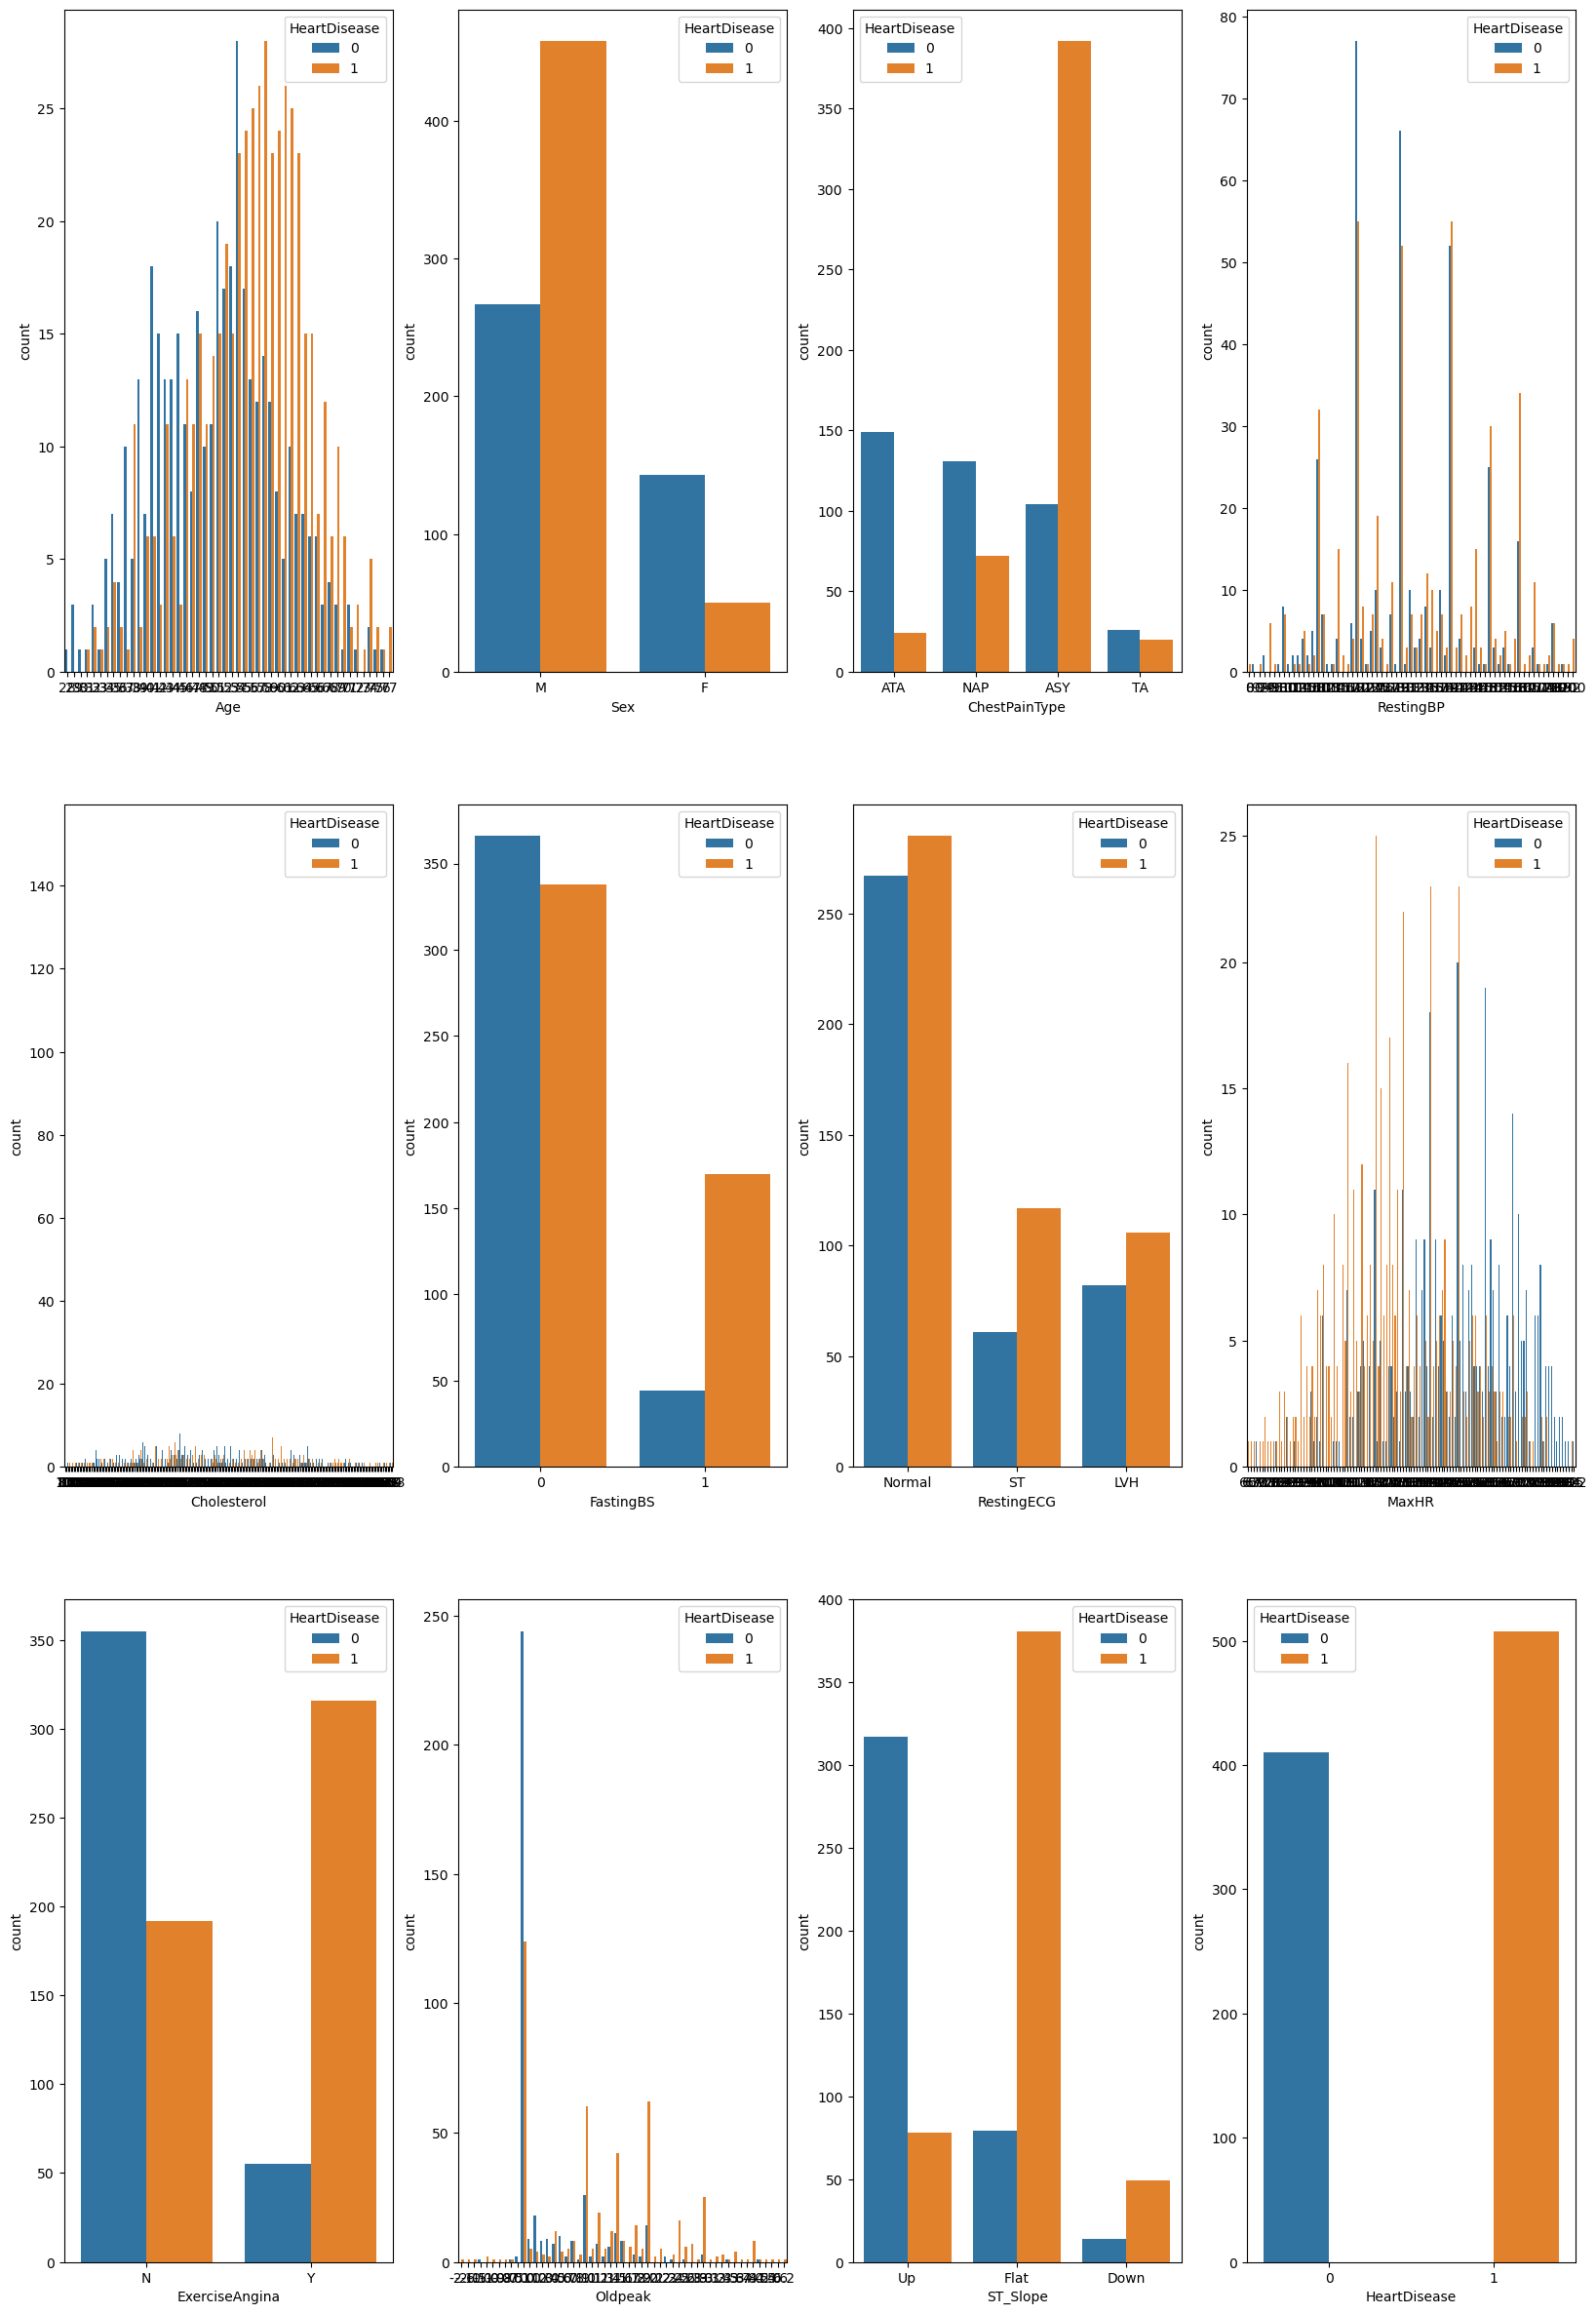

In [7]:
# Univatiate analysis 

plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.countplot(x = column,hue='HeartDisease',data=data)
    plotnumber+=1
plt.show()

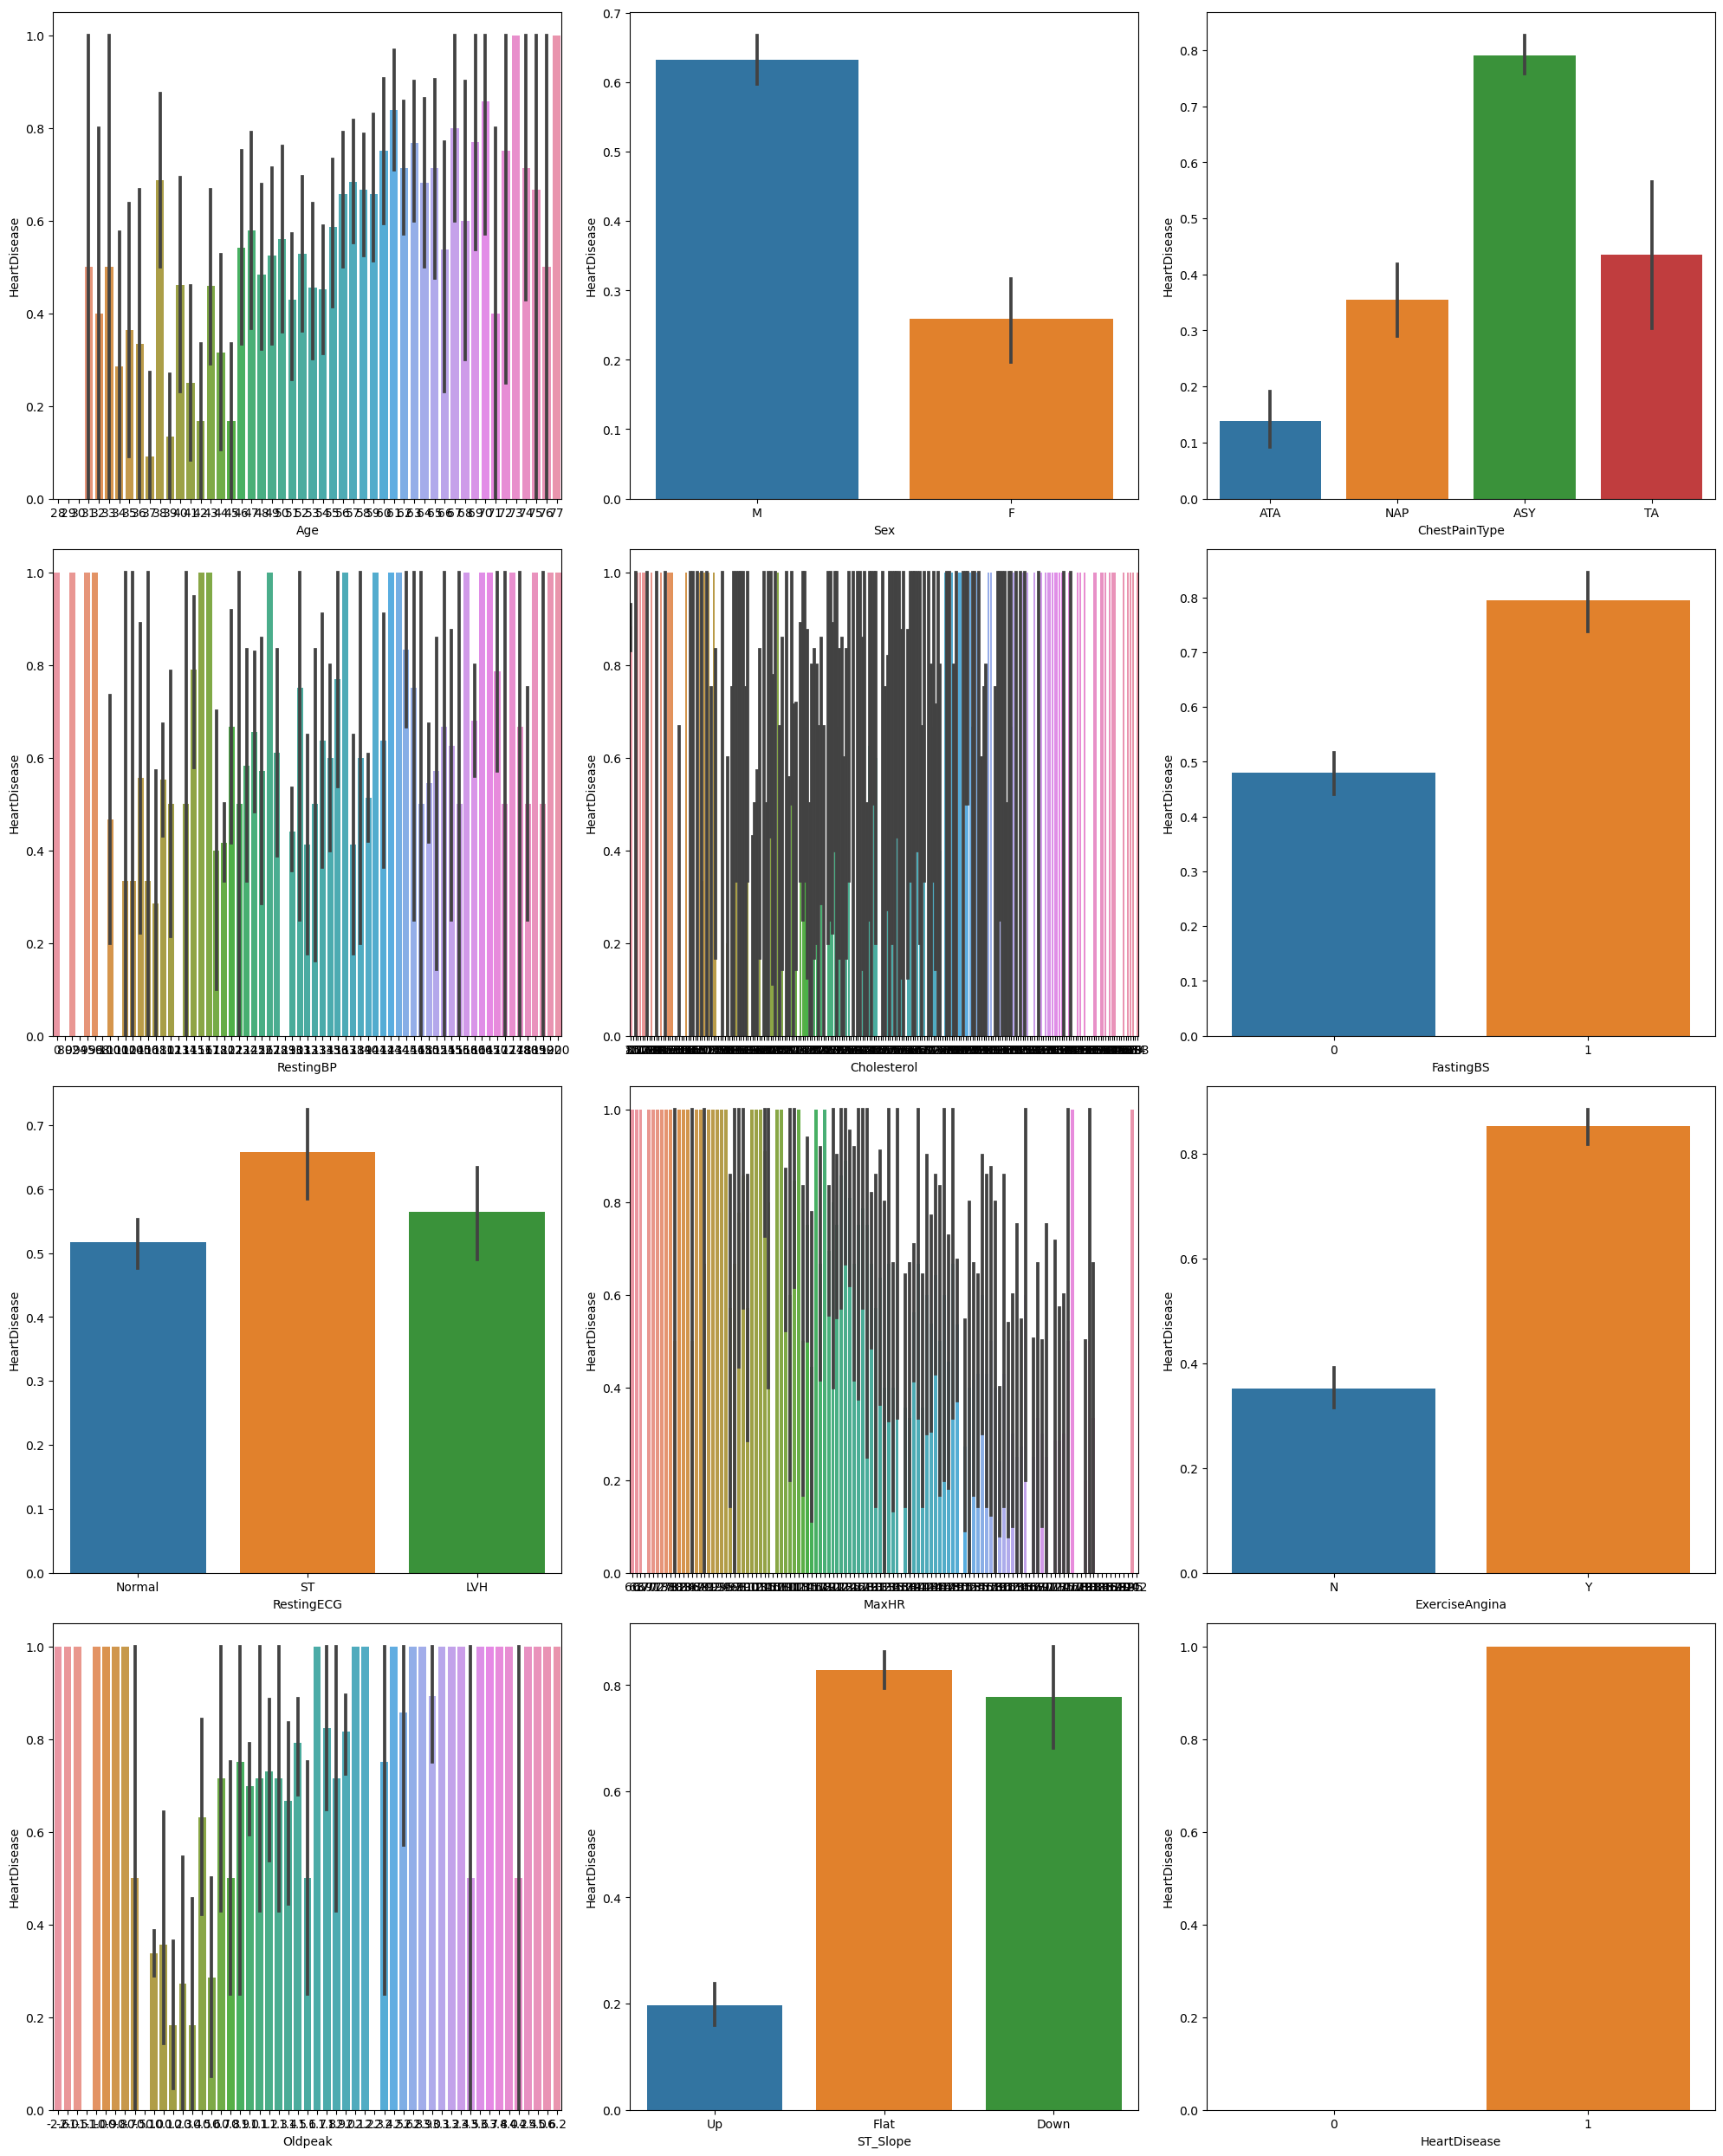

In [8]:
# bivariate analysis

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.barplot(x=column,y=data['HeartDisease'],data=data)
        plt.xlabel=(column)
        plt.ylabel=('HeartDisease')
    plotnumber+=1
plt.tight_layout()

In [9]:
data.describe(include=["O"])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


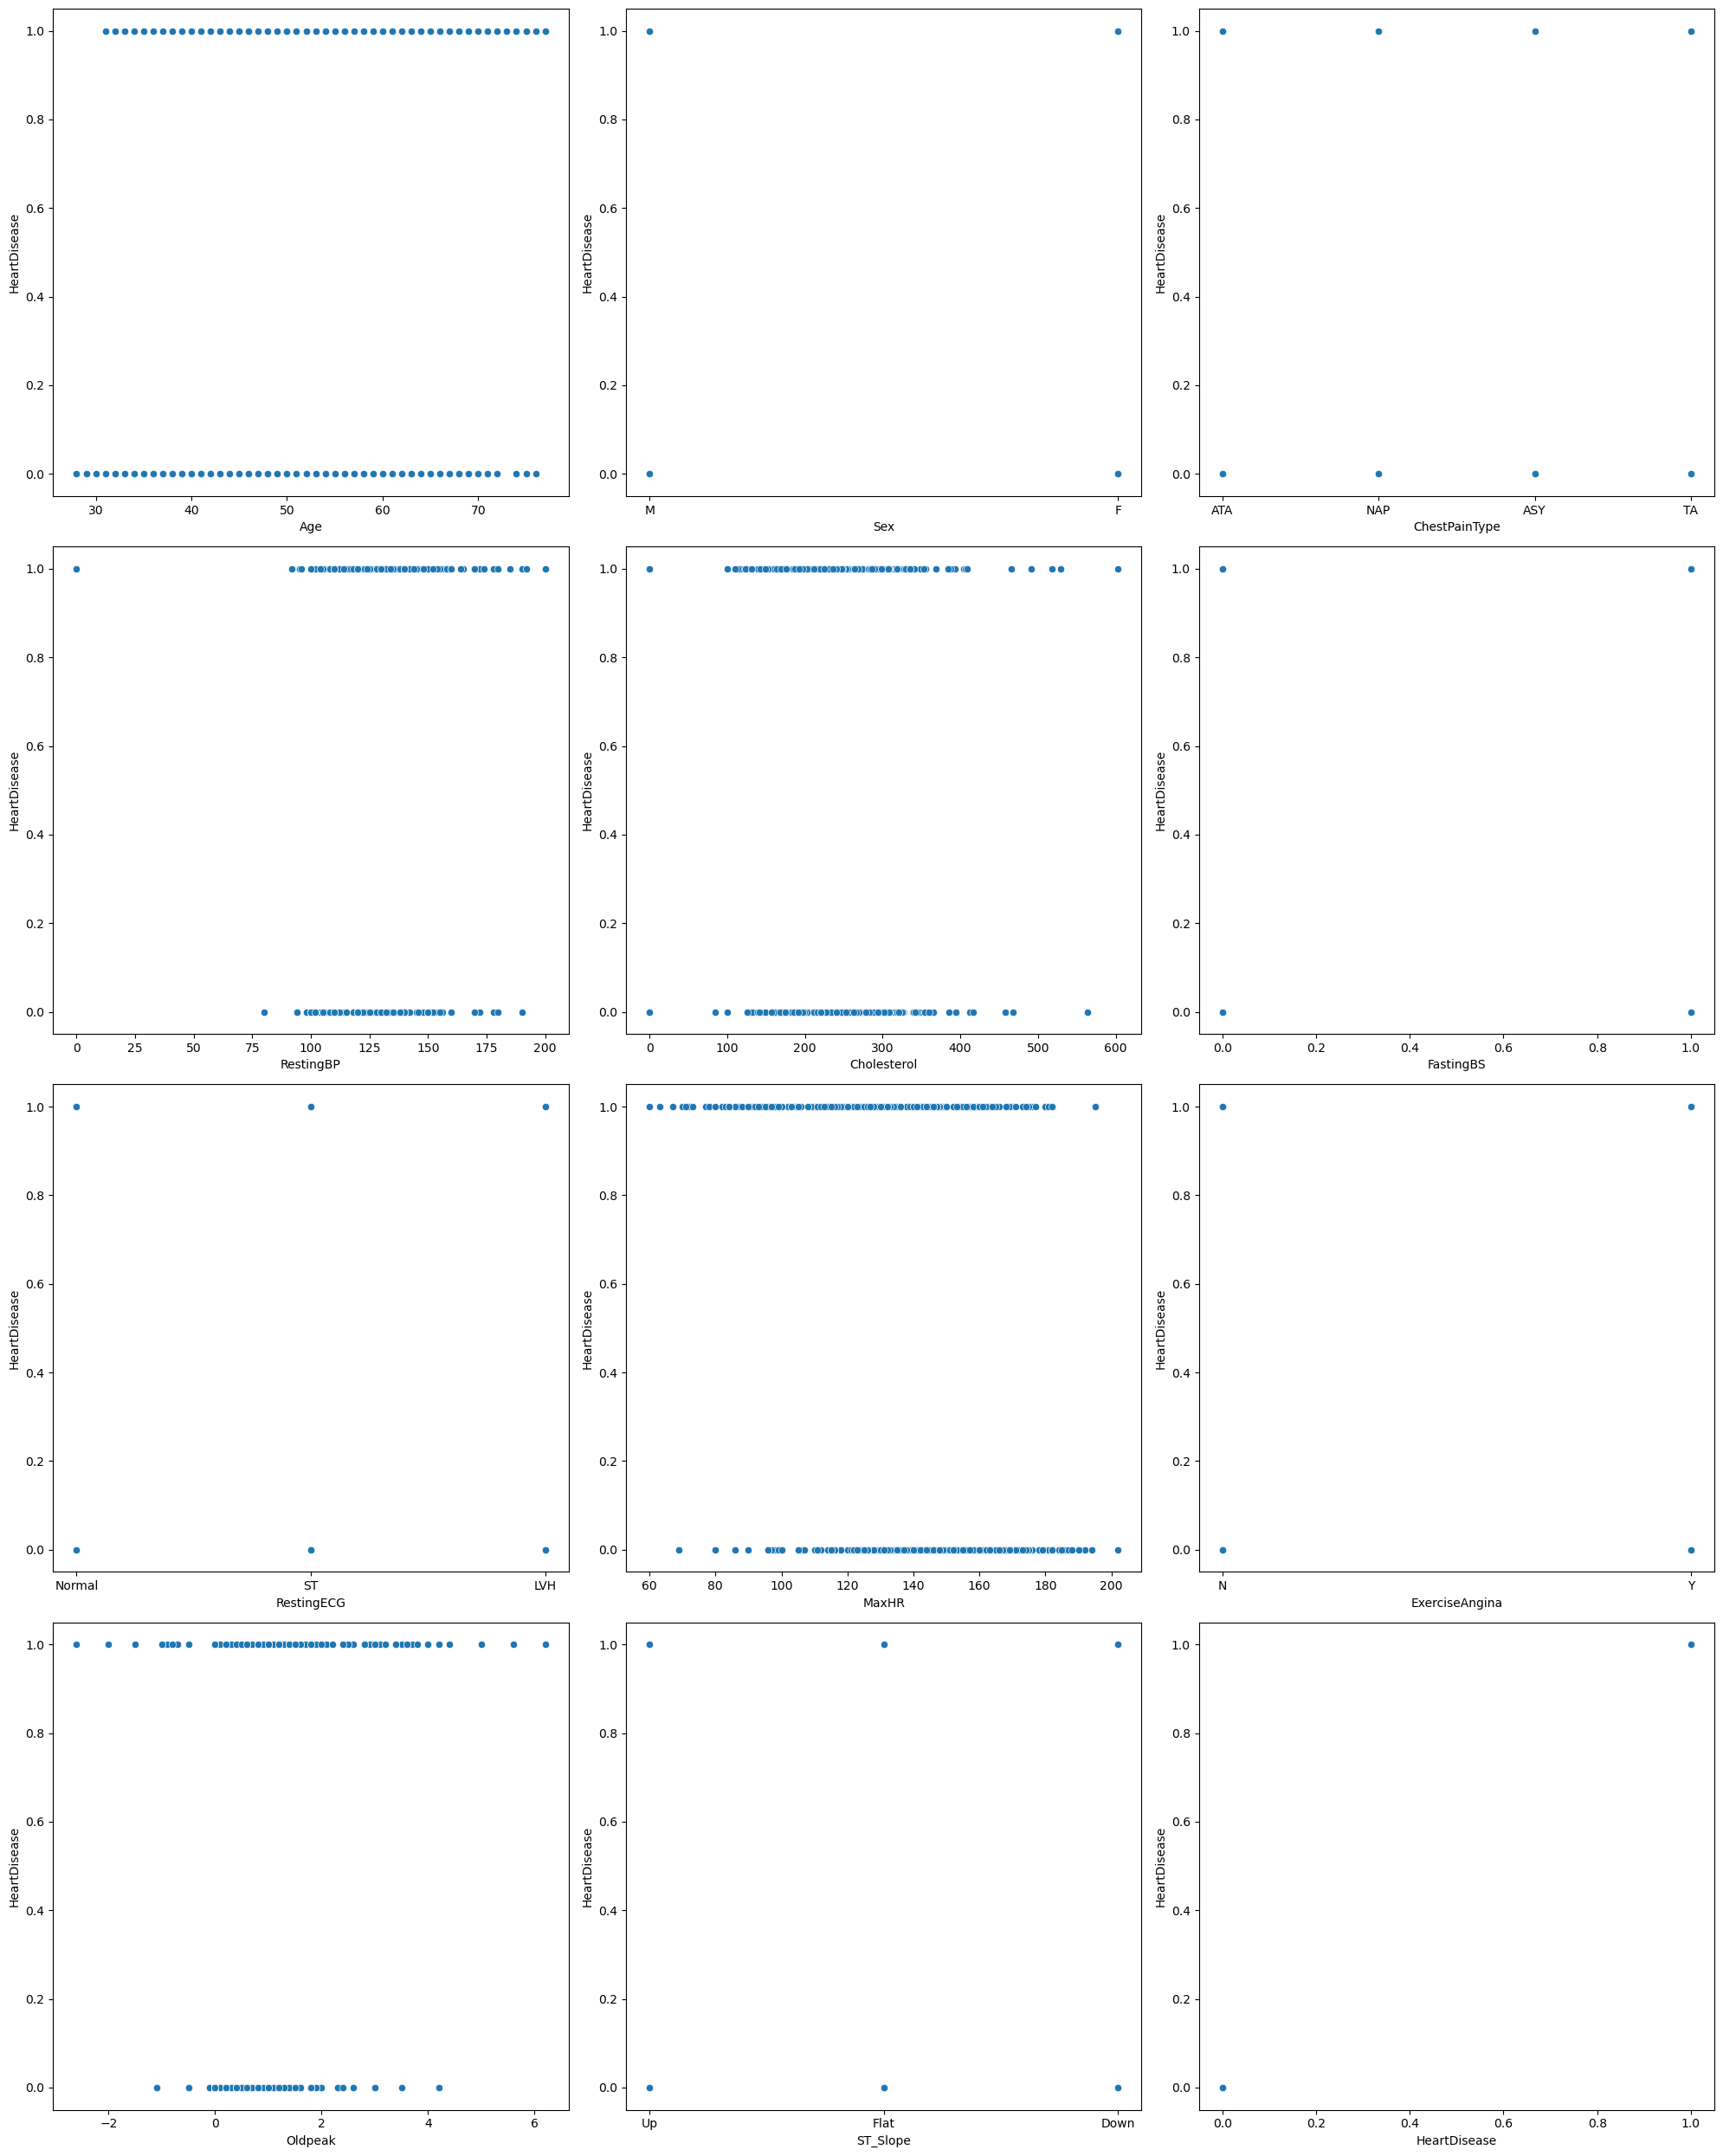

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

x = data.drop(["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],axis=1)

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.scatterplot(x=column,y='HeartDisease',data=data)
        plt.xlabel=(column)
        plt.ylabel=('HeartDisease')
    plotnumber+=1
plt.tight_layout()

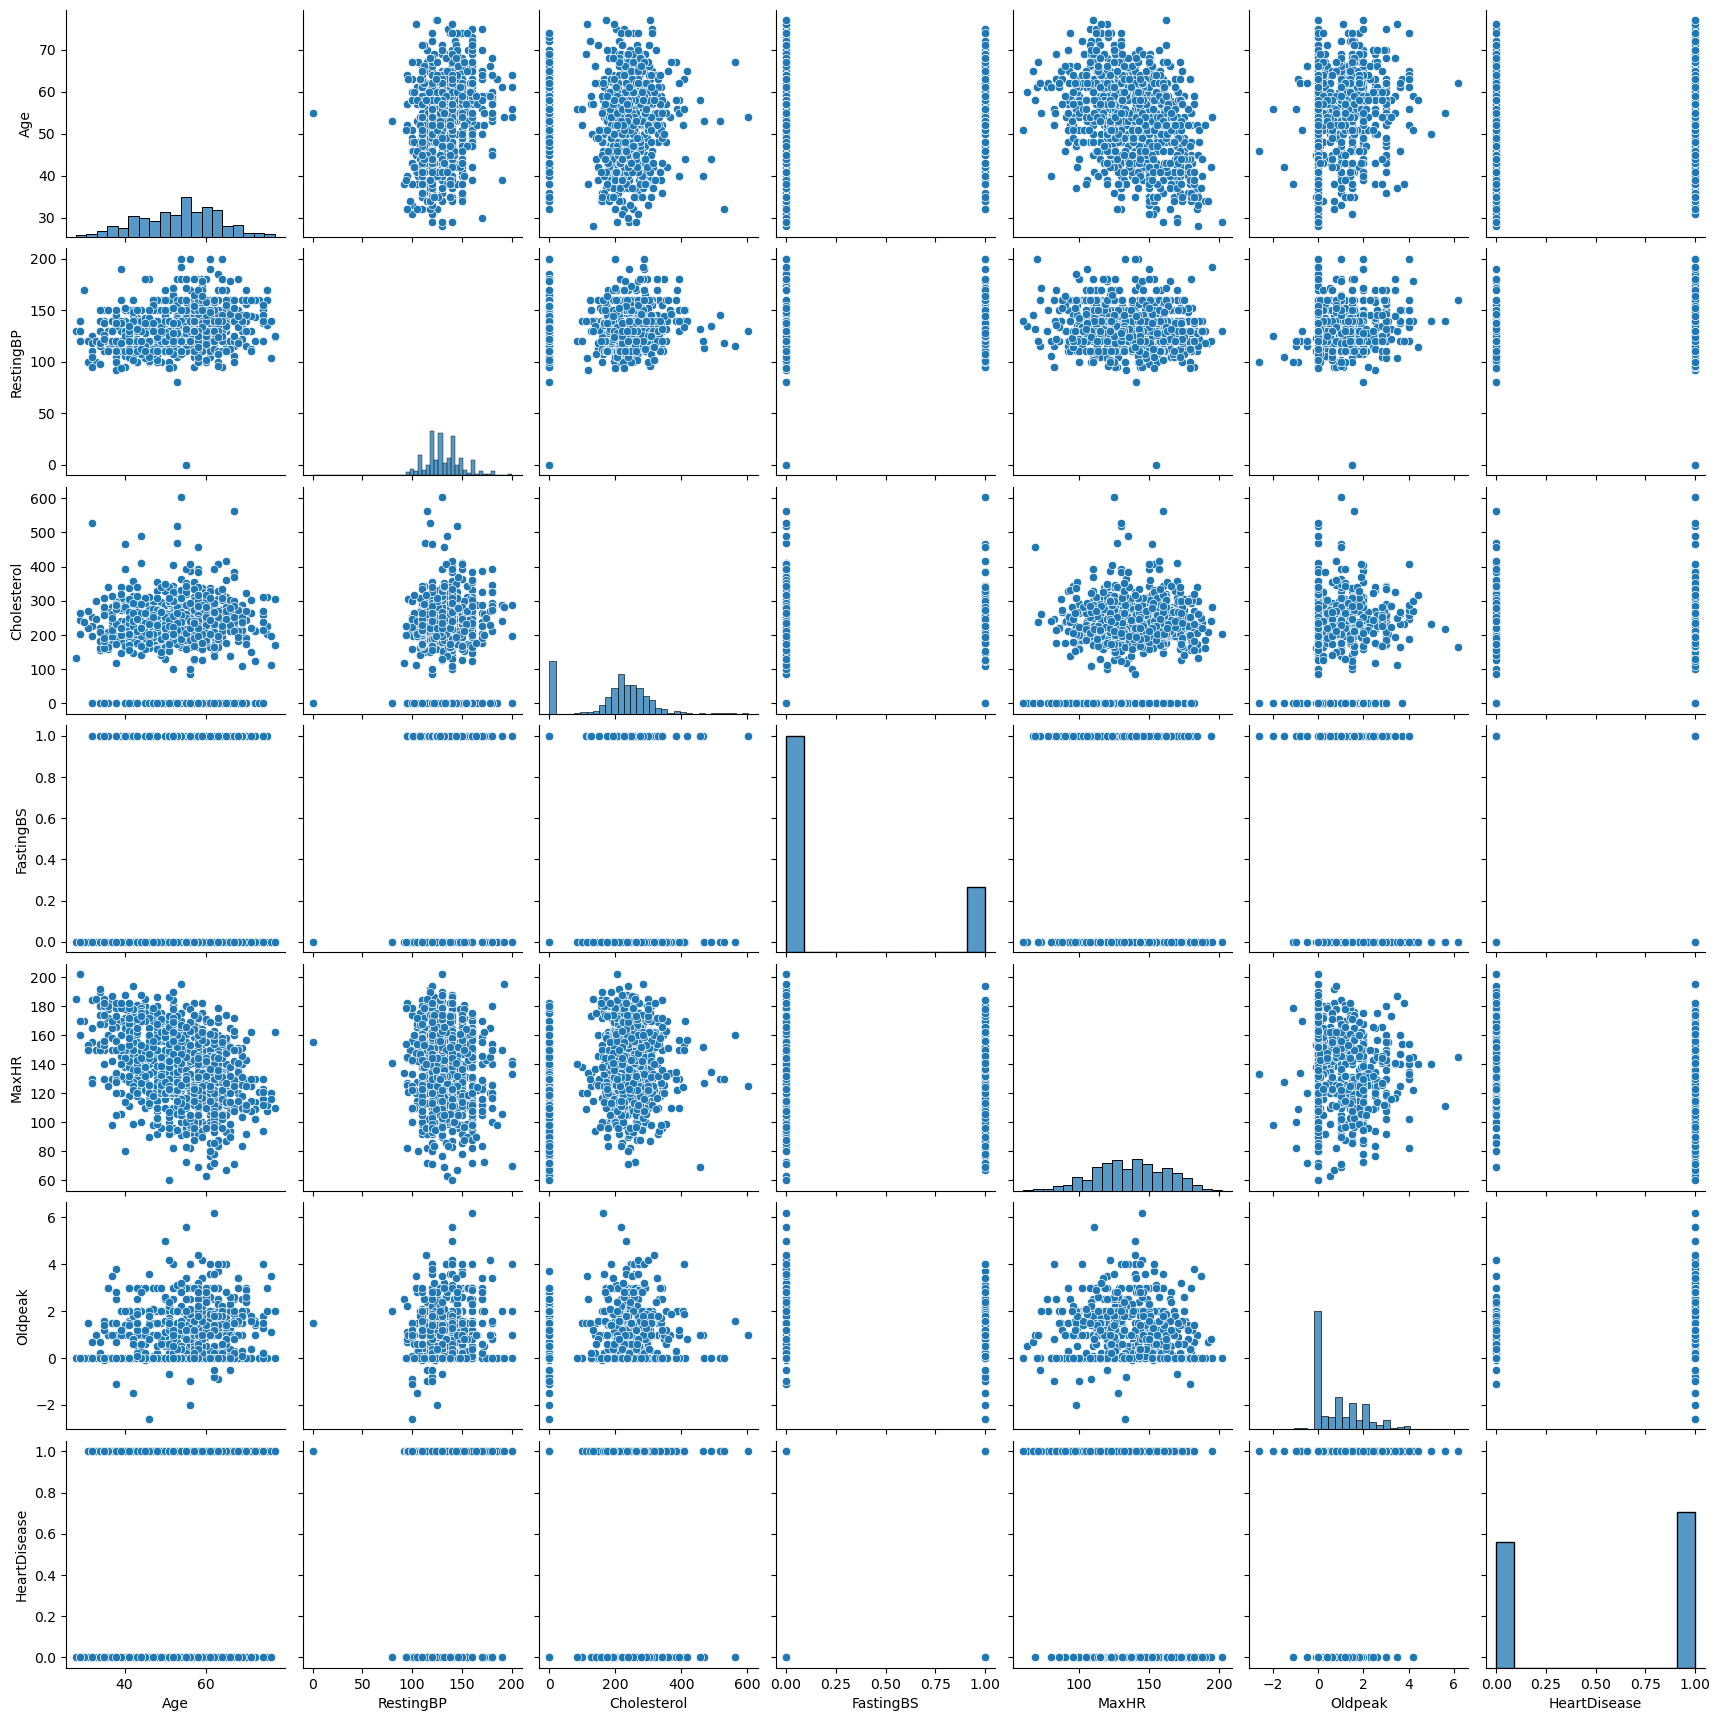

In [11]:
# multivariate analysis

sns.pairplot(data)

# Data Preprocessing and Feature Enginerring

In [12]:
# handling the missing data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
# Handling the corrupted data

data.RestingBP.replace(0,np.median(data.RestingBP),inplace=True)
data.Cholesterol.replace(0,np.median(data.Cholesterol),inplace=True)

In [15]:
data.loc[data['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [16]:
data.loc[data['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [17]:
data.describe(include=["O"])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [18]:
# Conveting categorical data in numeric 

# sex
data['Sex'] = data.Sex.map({"M":1,"F":0})

In [19]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
# chestPainType
data = pd.get_dummies(data=data,columns=["ChestPainType"],drop_first=True)

In [21]:
data = pd.get_dummies(data=data, columns=["RestingECG"],drop_first=True)

In [22]:
data = pd.get_dummies(data=data, columns=["ExerciseAngina"],drop_first=True)

In [23]:
data = pd.get_dummies(data=data, columns=["ST_Slope"],drop_first=True)

In [24]:
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1


In [25]:
# checking the outliers 

#plt.figure(figsize=(20,25),facecolor='white')
#plotnumber=1

#for column in data:
#if plotnumber<=12:
        #ax =plt.subplot(4,3,plotnumber)
        #sns.boxplot(data[column])
        #ax1 = plt.xlabel(column)
    #plotnumber+=1
#plt.tight_layout()

In [26]:
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1


In [27]:
# scaling the data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Sex','FastingBS','Oldpeak','HeartDisease','ChestPainType_ATA',
   'ChestPainType_NAP','ChestPainType_TA','RestingECG_Normal',
    'RestingECG_ST','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']
data1=sc.fit_transform(data.drop(dl,axis=1))

In [28]:
data1

array([[0.24489796, 0.5       , 0.39382239, 0.78873239],
       [0.42857143, 0.66666667, 0.18339768, 0.67605634],
       [0.18367347, 0.41666667, 0.38223938, 0.26760563],
       ...,
       [0.59183673, 0.41666667, 0.08880309, 0.38732394],
       [0.59183673, 0.41666667, 0.29150579, 0.8028169 ],
       [0.20408163, 0.48333333, 0.17374517, 0.79577465]])

In [29]:
data2 = pd.DataFrame(data1,columns=['Age','RestingBP','Cholesterol','MaxHR'])

In [30]:
con_data=data[['Sex','FastingBS','Oldpeak','HeartDisease','ChestPainType_ATA',
   'ChestPainType_NAP','ChestPainType_TA','RestingECG_Normal',
    'RestingECG_ST','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']]

In [31]:
data.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [32]:
final_df = pd.concat([data2,con_data],axis=1)

In [38]:
final_df = pd.concat

In [39]:
final_df

<function pandas.core.reshape.concat.concat(objs: 'Iterable[NDFrame] | Mapping[HashableT, NDFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'DataFrame | Series'>

# Feature selection

<Axes: >

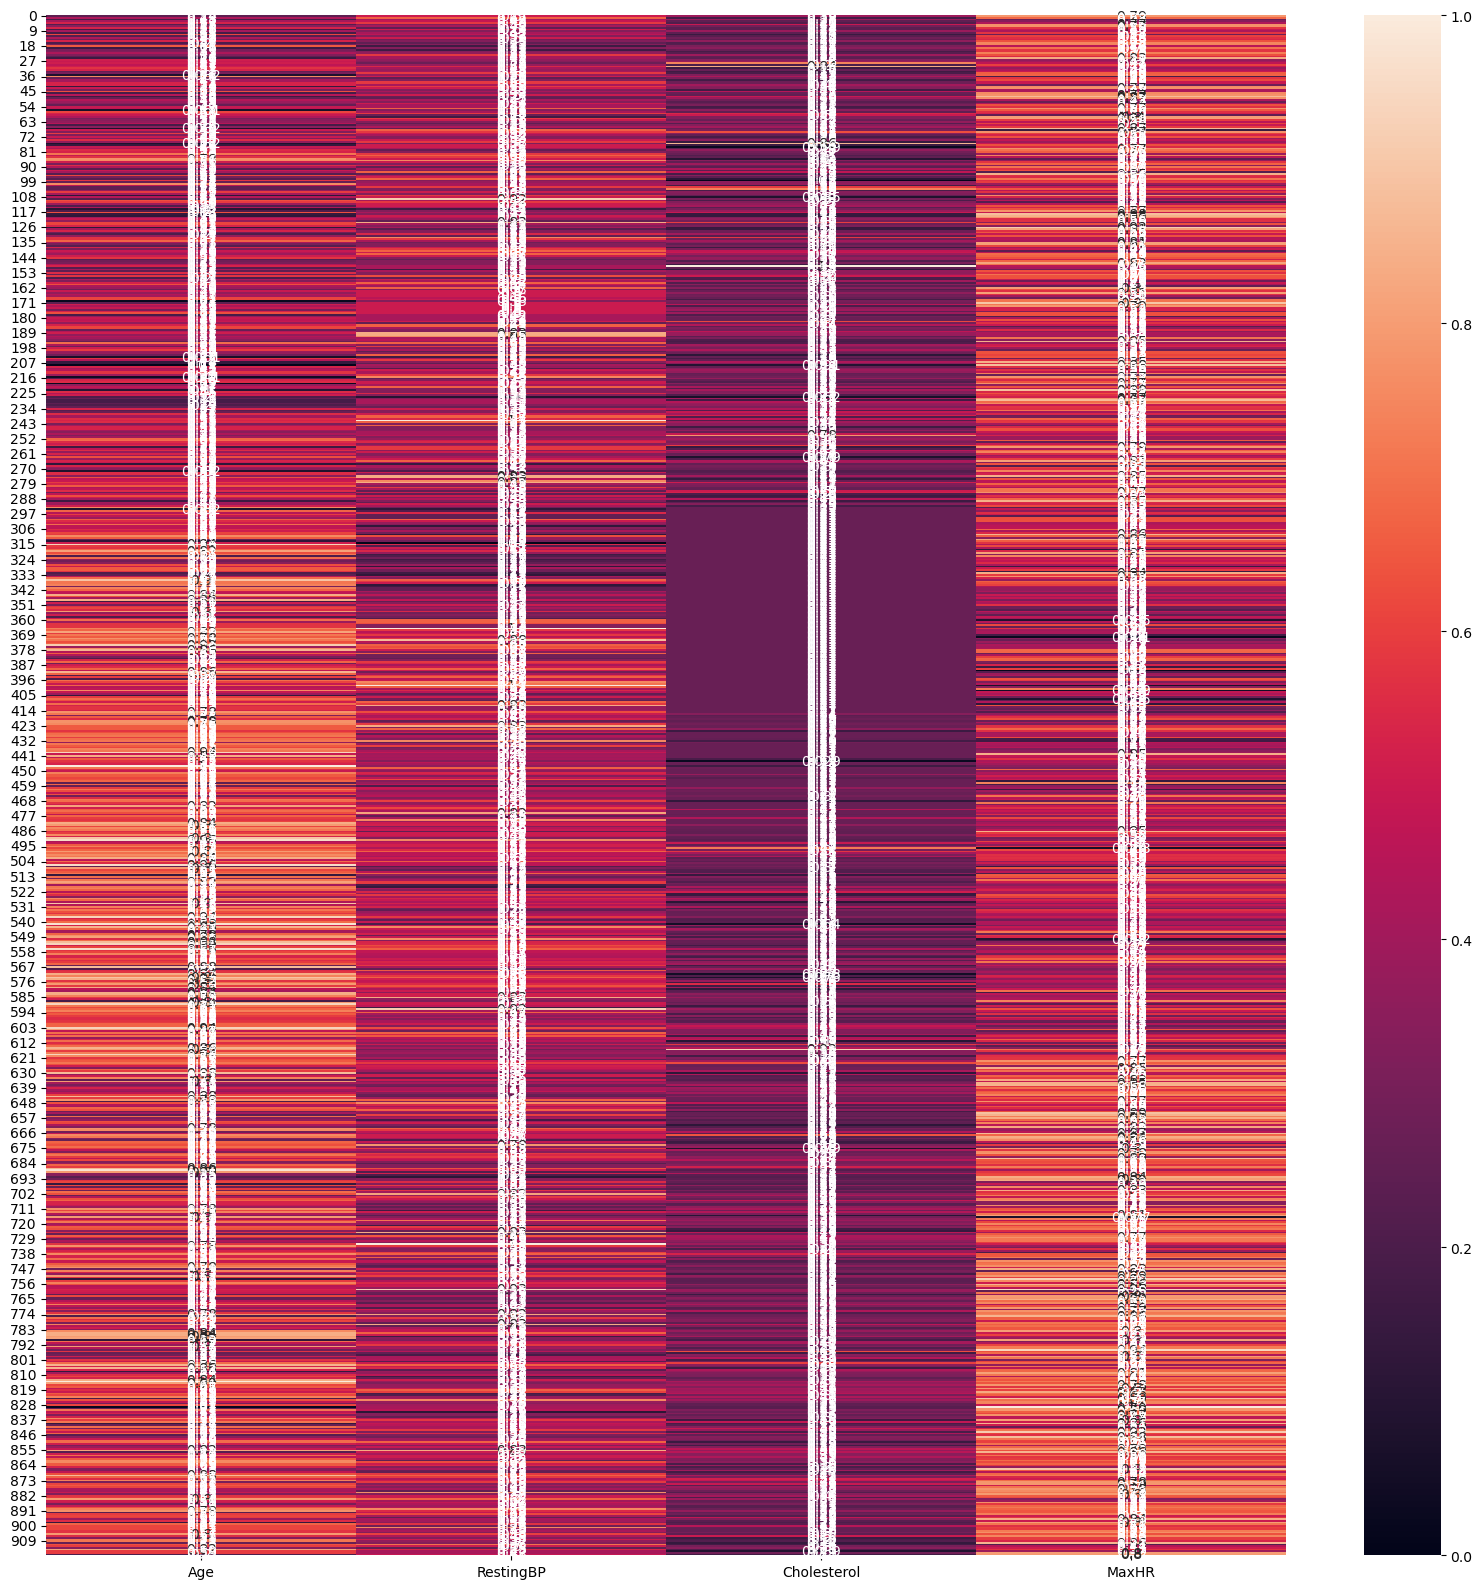

In [40]:
# correlation

plt.figure(figsize=(20,20))

sns.heatmap(data2,annot=True)

In [36]:
final_df.corr()

AttributeError: 'function' object has no attribute 'corr'

# Model Creation

In [37]:
# Creating independent and dependent variable.

X = final_df.drop('HeartDisease',axis=1)
y = final_df.HeartDisease

AttributeError: 'function' object has no attribute 'drop'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

In [ ]:
# Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

In [ ]:
# Prediction
y_pred=clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob

In [ ]:
data.HeartDisease.value_counts()

# Evaluation of model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
recall=recall_score(y_test,y_pred)
recall

In [ ]:
precision=precision_score(y_test,y_pred)
precision

In [ ]:
f1score=f1_score(y_test,y_pred)
f1score

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

In [ ]:
y_test.value_counts()